# Explorando Datos abiertos - Instituto Nacional de Colonizacion



In [84]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
from utils import plot_records_by_year, plot_surface_by_year 
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15, 6]

In [85]:
#archivos obtenido de https://www.colonizacion.com.uy/datos-abiertos
metadata = pd.read_csv("inc-ofrecimientostierra-metadataofrecimientos-v20171227.csv",sep=";",decimal=",")
metadata

,NombreAtributo,Descripcion,TipoDato
0,TipoOfrecimiento,Indica el mecanismo por el cual la tierra es o...,Alfanumérico
1,EsEstabilidadLechero,"En el caso de los ofrecimientos directos, pued...",Lógico
2,Fracciones,En el caso que el ofrecimiento se trate de fra...,Alfanumérico
3,FechaIngresoTramite,Fecha en que ingresó el trámite al INC.,Fecha
4,TipoNegocio1,Tipo de negocio del ofrecimiento. Los valores ...,Alfanumérico
5,TipoNegocio2,En el caso que el negocio tenga más de un tipo...,Alfanumérico
6,NroExpediente,Número del expediente en el que se tramitó el ...,Alfanumérico
7,EstadoOcupacion,Estado de ocupación en que se entrega la tierr...,Alfanumérico
8,Moneda,Moneda en la que está expresado el valor de la...,Alfanumérico
9,PrecioTotal,Precio total de la tierra ofrecida.,Numérico


In [86]:
df = pd.read_csv("inc-ofrecimientostierra-datos-v20221004.csv",sep=";",decimal=",") 

In [87]:
df.head(3)

,Tipo,Plan estabilidad lechero?,Fecha ingreso trámite,Fracciones Artº5,Tipo de negocio,Tipo de negocio.1,Nº expediente,Estado de ocupación,Moneda,Precio total,Superficie total(ha),Superficie CONEAT 100 (ha),Mejoras que incluye,Forma de entrega,Forma y plazo pago,Multa por incumplimiento,Padrones
0,Por Art. 35º,NO,04/10/2022,NaN,Donación,NaN,2022-70-1-01543,Ocupado,U$S,8102235,1080.2980,1113.3924,Comprende suelos y mejoras,La propietaria se reserva el usufructo de por ...,"En caso de hacer uso de la opción el INC, el p...",No hay,Río Negro-> Rural: 2897-2763
1,Por Art. 35º,NO,04/10/2022,NaN,Compraventa,NaN,2022-70-1-01545,Libre,U$S,4166057,1125.9613,842.9084,Comprende suelos y mejoras,Se entregará simultáneamente con la escritura ...,Conjuntamente con la firma de la escritura de ...,"U$S 416.605,681",Rocha-> Rural: 50739-56634-48535-3989-50740-22...
2,Por Art. 35º,NO,04/10/2022,NaN,Compraventa,NaN,2022-70-1-01546,Parcialmente ocupado,U$S,6128454,1829.9490,1425.5250,Suelos y mejoras,Se entregarán libres de ocupantes con la escri...,contado con la escriutra y cesión de derechos,U$S 300.000,Rivera-> Rural: 11478-10238-5627-11477-10237-2...


In [88]:
df.shape

(1854, 17)

El csv inc-ofrecimientostierra-datos-v20221004 tiene 1854 registros con 18 coumnas

In [89]:
#ajustes de los datos

#corrijo "Fecha ingreso trámite"
df.dropna(subset=["Fecha ingreso trámite"],inplace=True)
df["Fecha ingreso trámite"] = df["Fecha ingreso trámite"].apply(lambda x: x.replace("/0017","/2017"))
df["date_parsed"] = pd.to_datetime(df["Fecha ingreso trámite"], format="%d/%m/%Y")

#en el campo Padrones los valores vienen asi "Río Negro-> Rural:", hago un split por "->" para quedarme con el Departamento
df["Departamento"] = df.Padrones.apply(lambda x: x.split("->")[0])
df["date_parsed"] = pd.to_datetime(df["Fecha ingreso trámite"], format="%d/%m/%Y")
df["year"] = df.date_parsed.dt.year

<AxesSubplot:title={'center':'Tipo de ofrecimientos de tierra al INC'}>

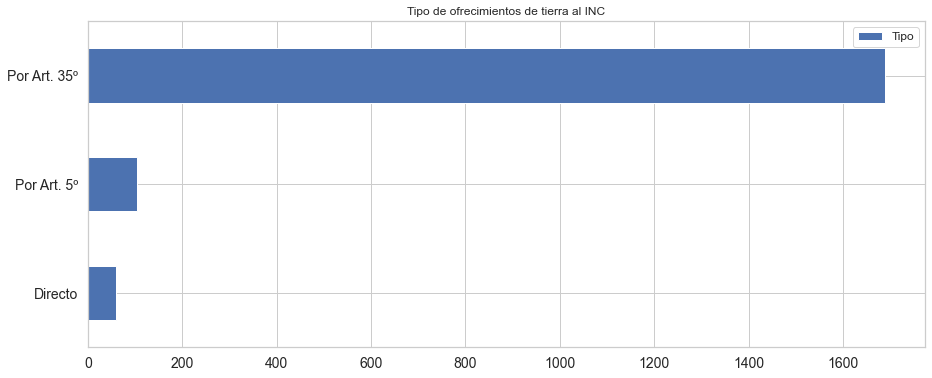

In [90]:
pd.DataFrame(df["Tipo"].value_counts().sort_values()).tail(15).plot.barh(title='Tipo de ofrecimientos de tierra al INC')

<AxesSubplot:title={'center':'Tipo de negocio'}>

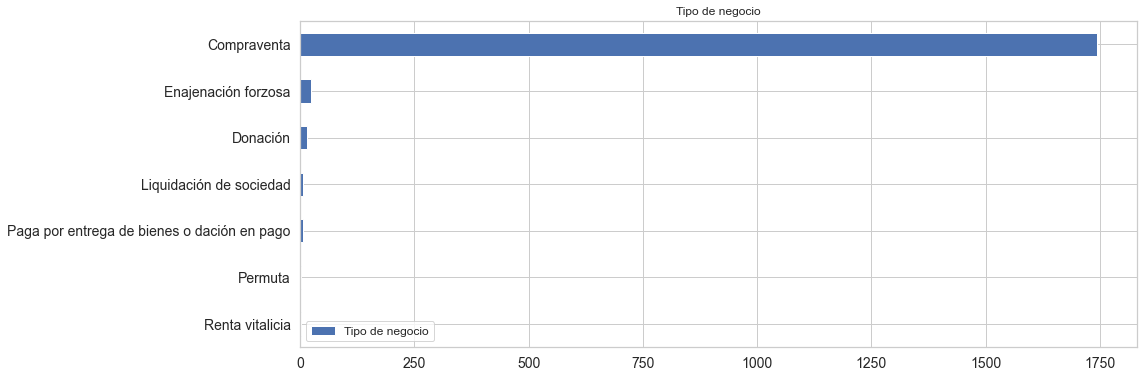

In [91]:
pd.DataFrame(df["Tipo de negocio"].value_counts().sort_values()).tail(15).plot.barh(title='Tipo de negocio')

<AxesSubplot:title={'center':'Total ofrecimientos de tierra por Departamento'}>

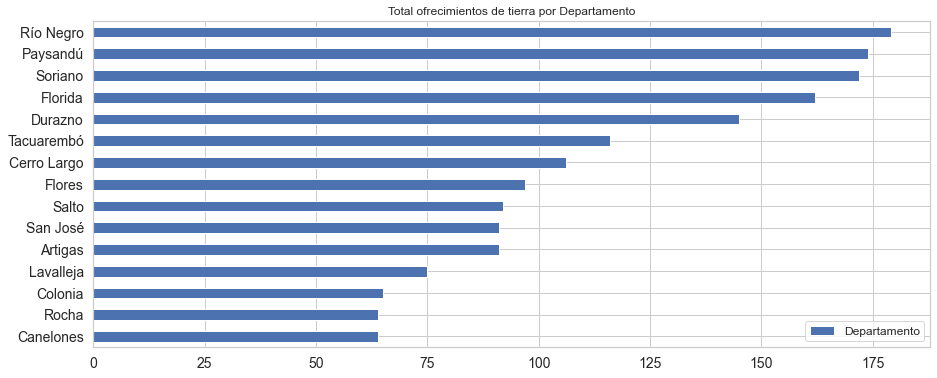

In [92]:
pd.DataFrame(df["Departamento"].value_counts().sort_values()).tail(15).plot.barh(title='Total ofrecimientos de tierra por Departamento')

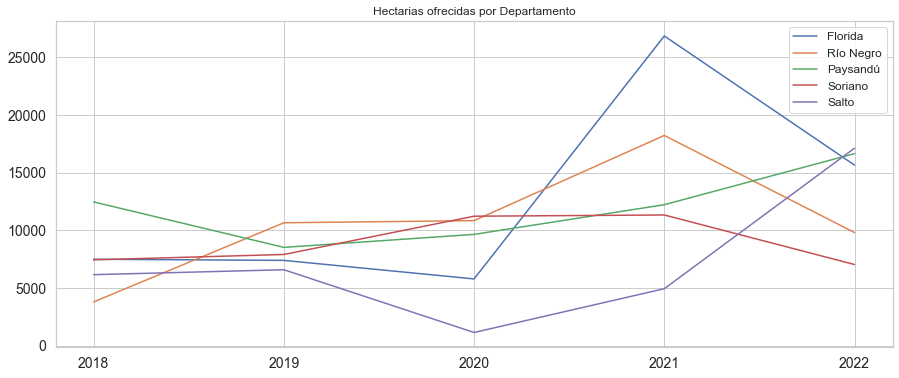

In [93]:
departments = ['Florida','Río Negro', 'Paysandú', 'Soriano','Salto']
from_year = 2017
plot_surface_by_year(df, departments, from_year)

In [94]:
df.shape

(1852, 20)

In [95]:
df["surface_value_ha"] = df.apply(lambda x: x["Precio total"]/x["Superficie total(ha)"], axis=1)

In [96]:
from_year = 2017
df2 = df[df.year > from_year].copy()

<AxesSubplot:title={'center':'Valor medio de la hectarea por Departamento (2017-2022)'}, ylabel='Departamento'>

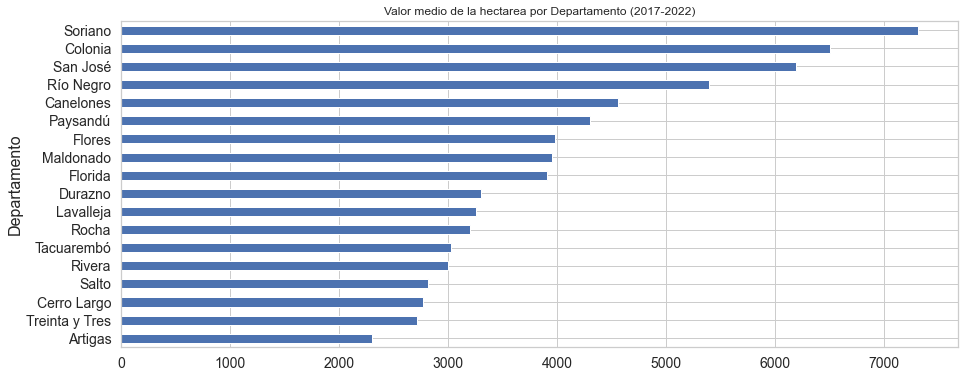

In [97]:
df2.groupby(by='Departamento').median(numeric_only=True)["surface_value_ha"].sort_values().plot.barh(
    title='Valor medio de la hectarea por Departamento (2017-2022)')